In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [32]:
data=pd.read_csv('train.csv')
display(data.head())
print('Shape of Data : ',data.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Shape of Data :  (891, 12)


In [33]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

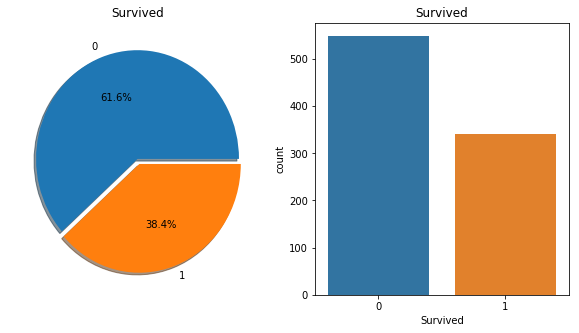

In [35]:
f,ax=plt.subplots(1,2,figsize=(10,5))
data['Survived'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

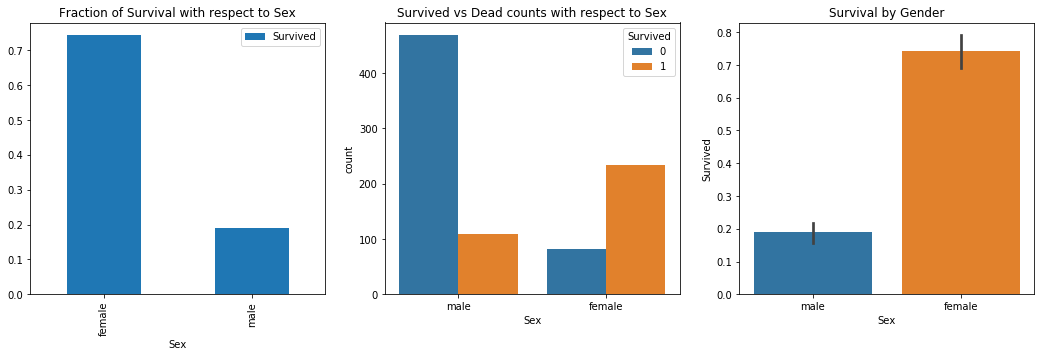

In [36]:
f,ax=plt.subplots(1,3,figsize=(18,5))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Fraction of Survival with respect to Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived vs Dead counts with respect to Sex')
sns.barplot(x="Sex", y="Survived", data=data,ax=ax[2])
ax[2].set_title('Survival by Gender')
plt.show()

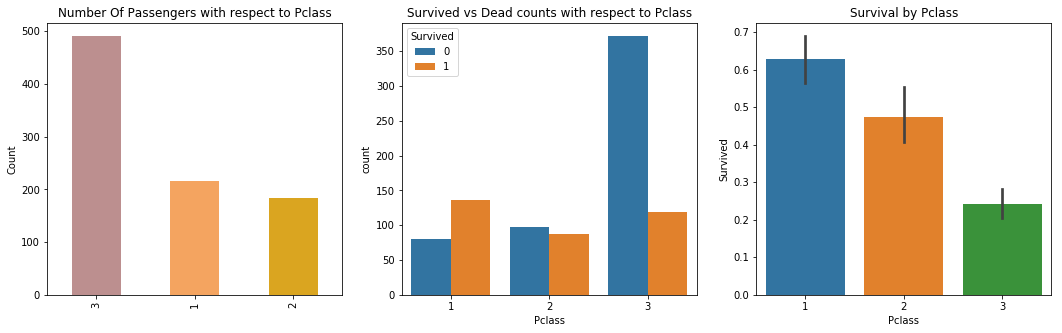

In [37]:
f,ax=plt.subplots(1,3,figsize=(18,5))
data['Pclass'].value_counts().plot.bar(color=['#BC8F8F','#F4A460','#DAA520'],ax=ax[0])
ax[0].set_title('Number Of Passengers with respect to Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived vs Dead counts with respect to Pclass')
sns.barplot(x="Pclass", y="Survived", data=data,ax=ax[2])
ax[2].set_title('Survival by Pclass')
plt.show()

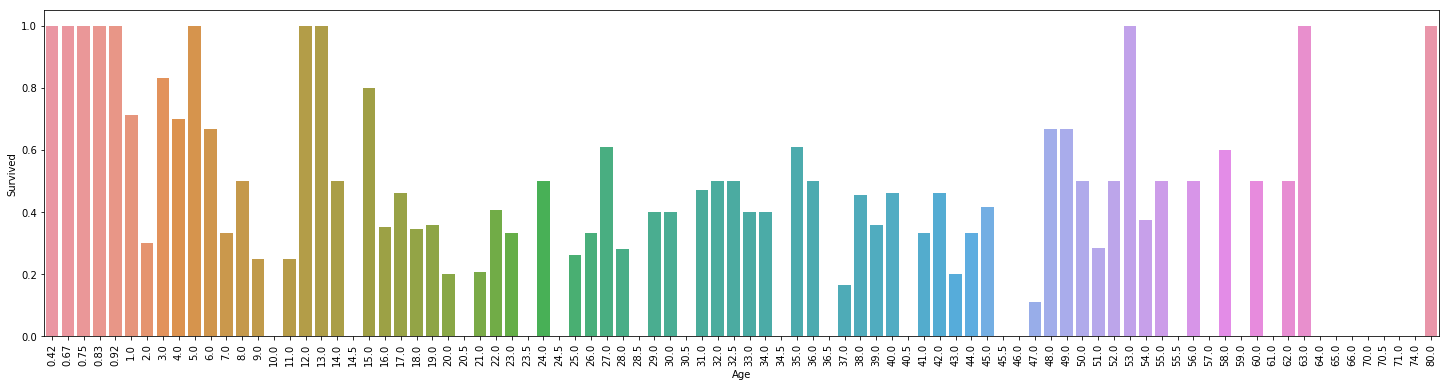

In [38]:
plt.figure(figsize=(25,6))
sns.barplot(data['Age'],data['Survived'], ci=None)
plt.xticks(rotation=90);

In [39]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [40]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [41]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [42]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [43]:
data.Age.isnull().any()

False

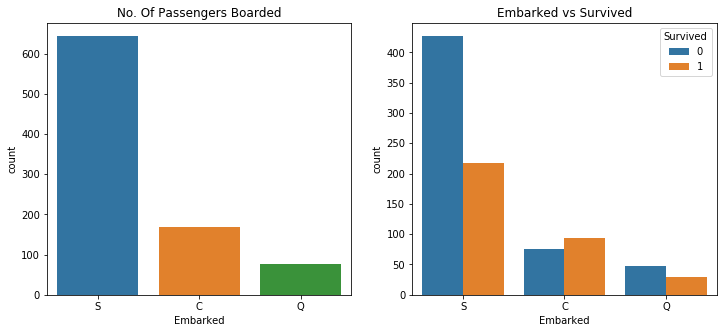

In [44]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot('Embarked',data=data,ax=ax[0])
ax[0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Embarked vs Survived')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

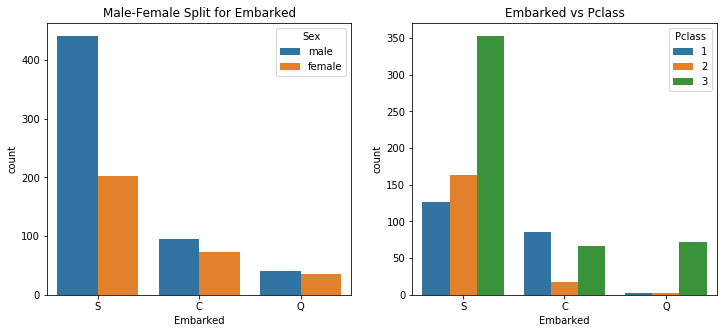

In [45]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0])
ax[0].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1])
ax[1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

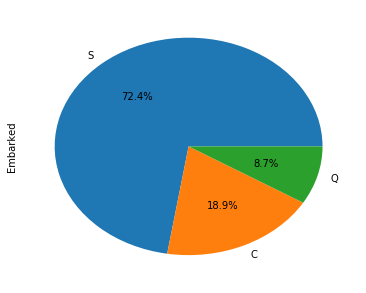

In [46]:
f,ax=plt.subplots(1,1,figsize=(6,5))
data['Embarked'].value_counts().plot.pie(explode=[0,0,0],autopct='%1.1f%%',ax=ax)
plt.show()

In [48]:
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()

False

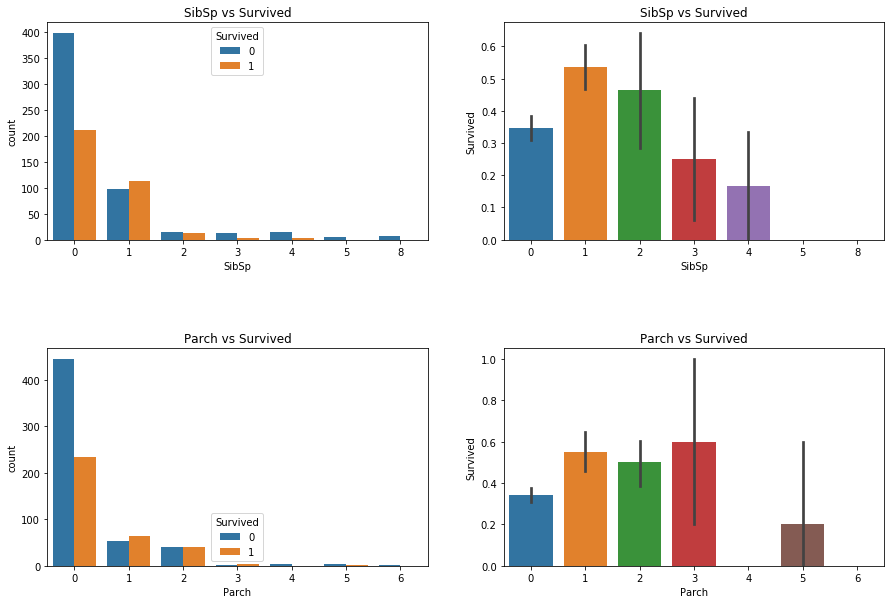

In [49]:
f,ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot('SibSp',hue='Survived',data=data,ax=ax[0,0])
ax[0,0].set_title('SibSp vs Survived')
sns.barplot('SibSp','Survived',data=data,ax=ax[0,1])
ax[0,1].set_title('SibSp vs Survived')

sns.countplot('Parch',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Parch vs Survived')
sns.barplot('Parch','Survived',data=data,ax=ax[1,1])
ax[1,1].set_title('Parch vs Survived')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

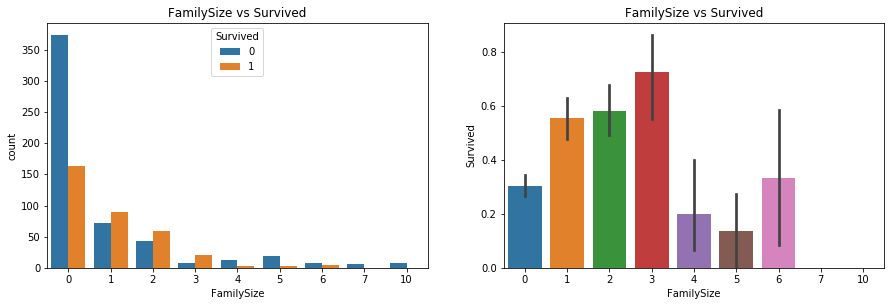

In [50]:
data['FamilySize'] = data['Parch'] + data['SibSp']
f,ax=plt.subplots(1,2,figsize=(15,4.5))
sns.countplot('FamilySize',hue='Survived',data=data,ax=ax[0])
ax[0].set_title('FamilySize vs Survived')
sns.barplot('FamilySize','Survived',data=data,ax=ax[1])
ax[1].set_title('FamilySize vs Survived')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

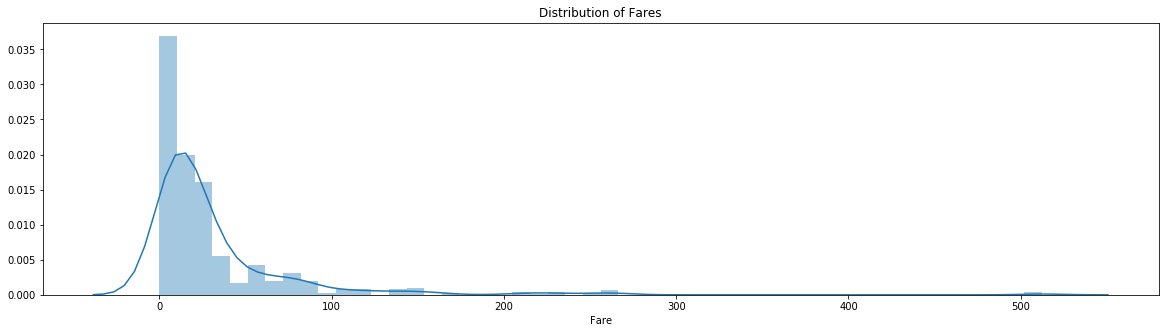

In [51]:
f,ax=plt.subplots(1,1,figsize=(20,5))
sns.distplot(data.Fare,ax=ax)
ax.set_title('Distribution of Fares')
plt.show()


In [52]:
print('Highest Fare:',data['Fare'].max(),'   Lowest Fare:',data['Fare'].min(),'    Average Fare:',data['Fare'].mean())
data['Fare_Bin']=pd.qcut(data['Fare'],6)
data.groupby(['Fare_Bin'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

Highest Fare: 512.3292    Lowest Fare: 0.0     Average Fare: 32.204207968574636


,Survived
Fare_Bin,
"(-0.001, 7.775]",0.205128
"(7.775, 8.662]",0.190789
"(8.662, 14.454]",0.366906
"(14.454, 26.0]",0.436242
"(26.0, 52.369]",0.417808
"(52.369, 512.329]",0.697987


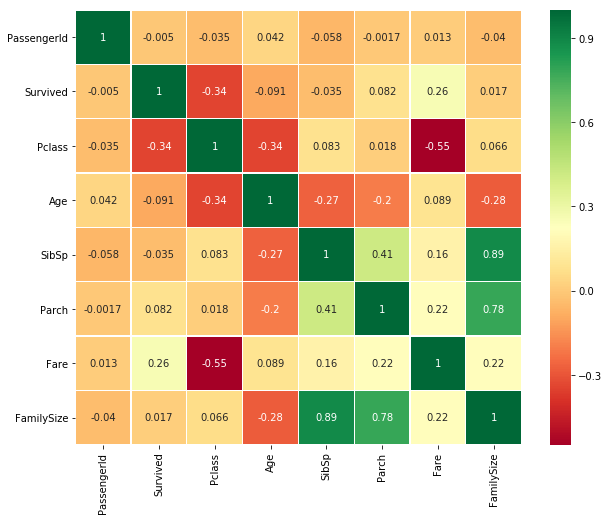

In [53]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [54]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [55]:
print('Highest Age:',data['Age'].max(),'   Lowest Age:',data['Age'].min())

Highest Age: 80.0    Lowest Age: 0.42


In [56]:
data['Age_cat']=0
data.loc[data['Age']<=16,'Age_cat']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_cat']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_cat']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_cat']=3
data.loc[data['Age']>64,'Age_cat']=4

In [57]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.775,'Fare_cat']=0
data.loc[(data['Fare']>7.775)&(data['Fare']<=8.662),'Fare_cat']=1
data.loc[(data['Fare']>8.662)&(data['Fare']<=14.454),'Fare_cat']=2
data.loc[(data['Fare']>14.454)&(data['Fare']<=26.0),'Fare_cat']=3
data.loc[(data['Fare']>26.0)&(data['Fare']<=52.369),'Fare_cat']=4
data.loc[data['Fare']>52.369,'Fare_cat']=5

In [58]:
data.drop(['Name','Age','Fare','Ticket','Cabin','Fare_Bin','SibSp','Parch','PassengerId'],axis=1,inplace=True)

In [59]:
data.head(2)

,Survived,Pclass,Sex,Embarked,Initial,FamilySize,Age_cat,Fare_cat
0,0,3,0,0,0,1,1,0
1,1,1,1,1,1,1,2,5


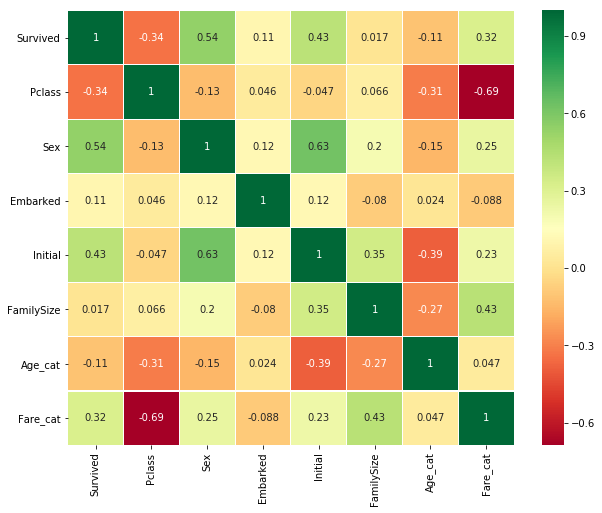

In [60]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [61]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [62]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [63]:
# Logistic Regression
model = LogisticRegression(C=0.05,solver='liblinear')
model.fit(train_X,train_Y.values.ravel())
LR_prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression model is \t',metrics.accuracy_score(LR_prediction,test_Y))

# Naive Bayes
model=GaussianNB()
model.fit(train_X,train_Y.values.ravel())
NB_prediction=model.predict(test_X)
print('The accuracy of the NaiveBayes model is\t\t\t',metrics.accuracy_score(NB_prediction,test_Y))

# Decision Tree
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
DT_prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is \t\t\t',metrics.accuracy_score(DT_prediction,test_Y))

# Random Forest
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y.values.ravel())
RF_prediction=model.predict(test_X)
print('The accuracy of the Random Forests model is \t\t',metrics.accuracy_score(RF_prediction,test_Y))

The accuracy of the Logistic Regression model is 	 0.8134328358208955
The accuracy of the NaiveBayes model is			 0.8134328358208955
The accuracy of the Decision Tree is 			 0.8134328358208955
The accuracy of the Random Forests model is 		 0.8134328358208955


In [64]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','Decision Tree','Naive Bayes','Random Forest']
models=[LogisticRegression(solver='liblinear'),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Logistic Regression,0.798002,0.022233
Decision Tree,0.802484,0.043784
Naive Bayes,0.803608,0.040184
Random Forest,0.805868,0.042183


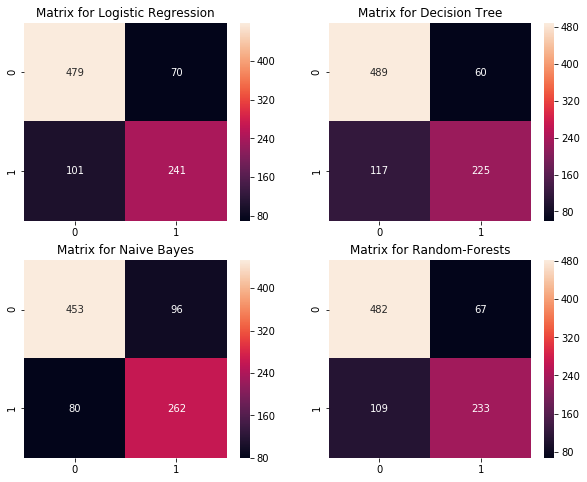

In [65]:
f,ax=plt.subplots(2,2,figsize=(10,8))
y_pred = cross_val_predict(LogisticRegression(C=0.05,solver='liblinear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Naive Bayes')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Random-Forests')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [66]:
from sklearn.model_selection import GridSearchCV
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True,cv=10)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
0.8125701459034792
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.1min finished


In [67]:
from sklearn.ensemble import VotingClassifier
estimators=[('RFor',RandomForestClassifier(n_estimators=100,random_state=0)),
            ('LR',LogisticRegression(C=0.05,solver='liblinear')),
            ('DT',DecisionTreeClassifier()),
            ('NB',GaussianNB())]
ensemble=VotingClassifier(estimators=estimators,voting='soft')
ensemble.fit(train_X,train_Y.values.ravel())
print('The accuracy for ensembled model is:',ensemble.score(test_X,test_Y))
cross=cross_val_score(ensemble,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8097014925373134


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/

The cross validated score is 0.8047142776075361


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [68]:
Ensemble_Model_For_Prediction=VotingClassifier(estimators=[
                                       ('RFor',RandomForestClassifier(n_estimators=200,random_state=0)),
                                       ('LR',LogisticRegression(C=0.05,solver='liblinear')),
                                       ('DT',DecisionTreeClassifier(random_state=0)),
                                       ('NB',GaussianNB())
                                             ], 
                       voting='soft')
Ensemble_Model_For_Prediction.fit(X,Y)

VotingClassifier(estimators=[('RFor', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_...=0.0, presort=False, random_state=0,
            splitter='best')), ('NB', GaussianNB(priors=None))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [69]:
test=pd.read_csv('test.csv')
IDtest = test["PassengerId"]
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [70]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [71]:
test['Initial']=0
for i in test:
    test['Initial']=test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
    
test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Other'],inplace=True)

# Fill Null values in Age Column
test.loc[(test.Age.isnull())&(test.Initial=='Mr'),'Age']=33
test.loc[(test.Age.isnull())&(test.Initial=='Mrs'),'Age']=36
test.loc[(test.Age.isnull())&(test.Initial=='Master'),'Age']=5
test.loc[(test.Age.isnull())&(test.Initial=='Miss'),'Age']=22
test.loc[(test.Age.isnull())&(test.Initial=='Other'),'Age']=46

# Fill Null values in Fare Column
test.loc[(test.Fare.isnull()) & (test['Pclass']==3),'Fare'] = 12.45

# Construct feature Age_cat
test['Age_cat']=0
test.loc[test['Age']<=16,'Age_cat']=0
test.loc[(test['Age']>16)&(test['Age']<=32),'Age_cat']=1
test.loc[(test['Age']>32)&(test['Age']<=48),'Age_cat']=2
test.loc[(test['Age']>48)&(test['Age']<=64),'Age_cat']=3
test.loc[test['Age']>64,'Age_cat']=4

# Construct feature Fare_cat
test['Fare_cat']=0
test.loc[test['Fare']<=7.775,'Fare_cat']=0
test.loc[(test['Fare']>7.775)&(test['Fare']<=8.662),'Fare_cat']=1
test.loc[(test['Fare']>8.662)&(test['Fare']<=14.454),'Fare_cat']=2
test.loc[(test['Fare']>14.454)&(test['Fare']<=26.0),'Fare_cat']=3
test.loc[(test['Fare']>26.0)&(test['Fare']<=52.369),'Fare_cat']=4
test.loc[test['Fare']>52.369,'Fare_cat']=5

# Construct feature FamilySize
test['FamilySize'] = test['Parch'] + test['SibSp']

# Drop unwanted features
test.drop(['Name','Age','Ticket','Cabin','SibSp','Parch','Fare','PassengerId'],axis=1,inplace=True)

# Converting String Values into Numeric 
test['Sex'].replace(['male','female'],[0,1],inplace=True)
test['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

test.head(2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,Sex,Embarked,Initial,Age_cat,Fare_cat,FamilySize
0,3,0,2,0,2,1,0
1,3,1,0,1,2,0,1


In [72]:
test_Survived = pd.Series(ensemble.predict(test), name="Survived")
results = pd.concat([IDtest,test_Survived],axis=1)
results.to_csv("predictions.csv",index=False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


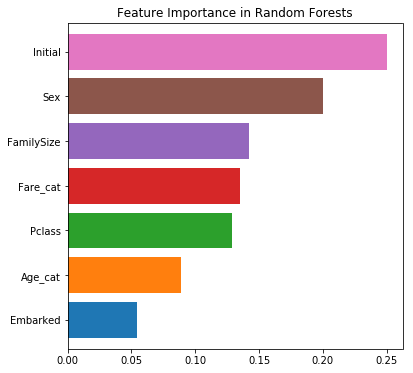

In [73]:
f,ax=plt.subplots(1,1,figsize=(6,6))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax)
ax.set_title('Feature Importance in Random Forests')
plt.show()